# #BlackLivesMatter Counts

The [newly released](https://twittercommunity.com/t/introducing-new-tweet-counts-endpoints-to-the-twitter-api-v2/155997) Twitter v2 API endpoint for counts allows you to do a search and get aggregate statistics by hour, day or month for tweets that match a given query. For example we can use the support in tarc to get daily counts of the use of the #blacklivesmatter hashtag.

First you will need to install and configure twarc.


In [ ]:
! pip install twarc
! twarc configure

Then you can run a job to collect all the counts using `--archive` to search the historical archive. This will require that you have access to the historical tweet archive.

In [ ]:
! twarc counts blacklivesmatter --csv --archive --granuarlity day > data/blacklivesmatter-counts.csv

Now we can load the CSV into a dataframe and visualize it.

In [17]:
import pandas

df = pandas.read_csv('data/blacklivesmatter-counts.csv', parse_dates=['start', 'end'])
df = df.sort_values('start')
df

,start,end,day_count
5549,2006-03-21 00:00:00+00:00,2006-03-22 00:00:00+00:00,0
5550,2006-03-22 00:00:00+00:00,2006-03-23 00:00:00+00:00,0
5551,2006-03-23 00:00:00+00:00,2006-03-24 00:00:00+00:00,0
5552,2006-03-24 00:00:00+00:00,2006-03-25 00:00:00+00:00,0
5553,2006-03-25 00:00:00+00:00,2006-03-26 00:00:00+00:00,0
...,...,...,...
26,2021-06-20 00:00:00+00:00,2021-06-21 00:00:00+00:00,12520
27,2021-06-21 00:00:00+00:00,2021-06-22 00:00:00+00:00,12024
28,2021-06-22 00:00:00+00:00,2021-06-23 00:00:00+00:00,9114
29,2021-06-23 00:00:00+00:00,2021-06-24 00:00:00+00:00,10689


How many #blacklivesmatter tweets have been sent in the history of Twitter?

In [18]:
df['day_count'].sum()

71190571

Hmmm does 71,190,571 seem low? I guess you do have to factor in the number of accounts and tweets that have been deleted but I definitely expected more. Anyway what do they look like over time?

<AxesSubplot:xlabel='start'>

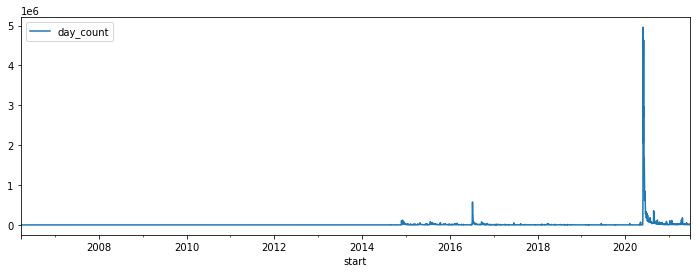

In [19]:
df.plot(x='start', y='day_count', figsize=(12, 4))

M'eh that graph isn't so great. What do the basic stats look like?

In [22]:
df.describe()

,day_count
count,5.575000e+03
mean,1.276961e+04
std,1.446967e+05
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+00
75%,3.563500e+03
max,4.959699e+06


In [23]:
import plotly.express as px

fig = px.line(df, x='start', y='day_count')
fig.show()

So what happened on May 28, 2020? 

https://twitter.com/MNNationalGuard/status/1266212998009536512

In [28]:
! twarc2 counts maga --archive --granularity day --csv > data/maga-counts.csv

In [30]:
df2 = pandas.read_csv('data/maga-counts.csv', parse_dates=['start', 'end'])
df2 = df2.sort_values('start')
df2

,start,end,day_count
5549,2006-03-21 00:00:00+00:00,2006-03-22 00:00:00+00:00,0
5550,2006-03-22 00:00:00+00:00,2006-03-23 00:00:00+00:00,0
5551,2006-03-23 00:00:00+00:00,2006-03-24 00:00:00+00:00,0
5552,2006-03-24 00:00:00+00:00,2006-03-25 00:00:00+00:00,0
5553,2006-03-25 00:00:00+00:00,2006-03-26 00:00:00+00:00,0
...,...,...,...
26,2021-06-20 00:00:00+00:00,2021-06-21 00:00:00+00:00,38964
27,2021-06-21 00:00:00+00:00,2021-06-22 00:00:00+00:00,35469
28,2021-06-22 00:00:00+00:00,2021-06-23 00:00:00+00:00,32001
29,2021-06-23 00:00:00+00:00,2021-06-24 00:00:00+00:00,28846


In [31]:
fig = px.line(df2, x='start', y='day_count')
fig.show()

The peak here, January 6 2021.

https://en.wikipedia.org/wiki/2021_United_States_Capitol_attack

In [33]:
df2['day_count'].sum()

120442565